This section will create the basic telemetry dataset needed to conduct our project. We will be using the OpenF1 API as the Ergast F1 API has been deprecated and fastf1 library no longer functioning. 

In [1]:
from urllib.request import urlopen
import json
import pandas as pd

In [183]:
# Attain information on session keys
response = urlopen('https://api.openf1.org/v1/sessions?year=2023')
data = json.loads(response.read().decode('utf-8'))

sessions_df = pd.DataFrame(data)

In [ ]:
sessions_df_

In [153]:
sessions_df[sessions_df['session_name'] == 'Race']

,location,country_key,country_code,country_name,circuit_key,circuit_short_name,session_type,session_name,date_start,date_end,gmt_offset,session_key,meeting_key,year
7,Sakhir,36,BRN,Bahrain,63,Sakhir,Race,Race,2023-03-05T15:00:00+00:00,2023-03-05T17:00:00+00:00,03:00:00,7953,1141,2023
12,Jeddah,153,KSA,Saudi Arabia,149,Jeddah,Race,Race,2023-03-19T17:00:00+00:00,2023-03-19T19:00:00+00:00,03:00:00,7779,1142,2023
17,Melbourne,5,AUS,Australia,10,Melbourne,Race,Race,2023-04-02T05:00:00+00:00,2023-04-02T07:00:00+00:00,10:00:00,7787,1143,2023
22,Baku,30,AZE,Azerbaijan,144,Baku,Race,Race,2023-04-30T11:00:00+00:00,2023-04-30T13:00:00+00:00,04:00:00,9070,1207,2023
27,Miami,19,USA,United States,151,Miami,Race,Race,2023-05-07T19:30:00+00:00,2023-05-07T21:30:00+00:00,-04:00:00,9078,1208,2023
32,Monaco,114,MON,Monaco,22,Monte Carlo,Race,Race,2023-05-28T13:00:00+00:00,2023-05-28T15:00:00+00:00,02:00:00,9094,1210,2023
37,Barcelona,1,ESP,Spain,15,Catalunya,Race,Race,2023-06-04T13:00:00+00:00,2023-06-04T15:00:00+00:00,02:00:00,9102,1211,2023
42,Montréal,46,CAN,Canada,23,Montreal,Race,Race,2023-06-18T18:00:00+00:00,2023-06-18T20:00:00+00:00,-04:00:00,9110,1212,2023
46,Spielberg,17,AUT,Austria,19,Spielberg,Race,Race,2023-07-02T13:00:00+00:00,2023-07-02T15:00:00+00:00,02:00:00,9118,1213,2023
51,Silverstone,2,GBR,Great Britain,2,Silverstone,Race,Race,2023-07-09T14:00:00+00:00,2023-07-09T16:00:00+00:00,01:00:00,9126,1214,2023


In [13]:
sesh_keys = sessions_df[sessions_df['session_name'] == 'Race'][['location', 'session_key']]

In [15]:
sesh_keys

,location,session_key
7,Sakhir,7953
12,Jeddah,7779
17,Melbourne,7787
22,Baku,9070
27,Miami,9078
32,Monaco,9094
37,Barcelona,9102
42,Montréal,9110
46,Spielberg,9118
51,Silverstone,9126


In [14]:
drivers = {1: 'VER', 11: 'PER', 16: 'LEC', 55: 'SAI', 44: 'HAM',
           63: 'RUS', 31: 'OCO', 10: 'GAS', 4: 'NOR', 81: 'PIA',
           77: 'BOT', 24: 'GUA', 18: 'STR', 14: 'ALO', 20: 'MAG',
           27:'HUK', 3: 'RIC', 22: 'TSU', 23: 'ALB', 2: 'SAR'}

In [ ]:
# Attain laps data
for drv in drivers.keys():
    response = urlopen(f{'https://api.openf1.org/v1/car_data?driver_number={drv}&session_key'})

In [ ]:
def convert_timedelta(date_string):
    time_part = date_string.s

In [116]:
laps

,x,y,z,driver_number,date,session_key,meeting_key
0,0,0,0,1,2023-03-05T14:01:02.526000+00:00,7953,1141
1,0,0,0,1,2023-03-05T14:01:02.846000+00:00,7953,1141
2,0,0,0,1,2023-03-05T14:01:03.186000+00:00,7953,1141
3,0,0,0,1,2023-03-05T14:01:03.466000+00:00,7953,1141
4,0,0,0,1,2023-03-05T14:01:03.566000+00:00,7953,1141
...,...,...,...,...,...,...,...
36830,-217,1514,-159,1,2023-03-05T16:42:02.485000+00:00,7953,1141
36831,-217,1514,-159,1,2023-03-05T16:42:02.885000+00:00,7953,1141
36832,-217,1514,-159,1,2023-03-05T16:42:03.165000+00:00,7953,1141
36833,-217,1514,-159,1,2023-03-05T16:42:03.445000+00:00,7953,1141


In [117]:
# Attain the telemetry car data
end_time = pd.DataFrame(columns = ['Driver', 'Time'])
for drv in drivers.keys():
    
    url = f'https://api.openf1.org/v1/laps?session_key=7953&driver_number={drv}'
    response = urlopen(url)
    data = json.loads(response.read().decode('utf-8'))
    laps = pd.DataFrame(data)
    date_string = laps.loc[len(laps)-1, :]['date_start']

    time_part = date_string.split('T')[1]
    # Split the time part
    time_components = time_part.split(':')
    hours = int(time_components[0])
    minutes = int(time_components[1])
    seconds = float(time_components[2].split('+')[0])  # Remove timezone if present

    # Create timedelta
    time_delta = pd.Timedelta(hours=hours, minutes=minutes, seconds=seconds)

    dur = laps.loc[len(laps)-1, :]['lap_duration']
    dur_del = pd.Timedelta(seconds = float(dur))

    end_time['Driver'] = drivers[drv]
    end_time['Time'] = time_delta + dur_del


ValueError: cannot convert float NaN to integer

In [185]:
import os

In [187]:
os.get_cwd()

AttributeError: module 'os' has no attribute 'get_cwd'

In [ ]:
url

In [164]:
url = 'https://api.openf1.org/v1/race_control'
response = urlopen(url)
data = json.loads(response.read().decode('utf-8'))
flags = pd.DataFrame(data)
flags

,date,category,flag,scope,message,session_key,meeting_key,driver_number,lap_number,sector
0,2023-02-23T07:00:00+00:00,Flag,GREEN,Track,GREEN LIGHT - PIT EXIT OPEN,9222,1140,NaN,NaN,NaN
1,2023-02-23T07:00:00+00:00,Flag,GREEN,Track,GREEN LIGHT - PIT EXIT OPEN,9222,1140,NaN,NaN,NaN
2,2023-02-23T07:08:43+00:00,Flag,RED,Track,RED FLAG,9222,1140,NaN,NaN,NaN
3,2023-02-23T07:08:43+00:00,Flag,RED,Track,RED FLAG,9222,1140,NaN,NaN,NaN
4,2023-02-23T07:25:11+00:00,Other,None,None,SESSION WILL RESUME AT 10:30,9222,1140,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7677,2024-07-07T15:23:17+00:00,Flag,BLUE,Driver,WAVED BLUE FLAG FOR CAR 3 (RIC) TIMED AT 16:23:17,9558,1240,3.0,51.0,NaN
7678,2024-07-07T15:23:18+00:00,Flag,BLUE,Driver,WAVED BLUE FLAG FOR CAR 11 (PER) TIMED AT 16:2...,9558,1240,11.0,51.0,NaN
7679,2024-07-07T15:24:52+00:00,Flag,BLUE,Driver,WAVED BLUE FLAG FOR CAR 3 (RIC) TIMED AT 16:24:51,9558,1240,3.0,52.0,NaN
7680,2024-07-07T15:25:39+00:00,Flag,CHEQUERED,Track,CHEQUERED FLAG,9558,1240,NaN,52.0,NaN


In [177]:
flags[(flags.session_key == 7953)]['driver_number'].unique()

array([nan, 63., 31.,  4., 27., 21., 24., 18., 20.,  2.])

In [181]:
url = 'https://api.openf1.org/v1/laps?session_key=7953&driver_number=1'
response = urlopen(url)
data = json.loads(response.read().decode('utf-8'))
laps = pd.DataFrame(data)
laps

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
0,1141,7953,1,232.0,231,252.0,None,NaN,False,NaN,42.414,23.842,"[2048, 2048, 2049, 2049, 2051, 2051, 2049, 204...","[2051, 2049, 2051, 2049, 2051, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 0]",1
1,1141,7953,1,227.0,238,288.0,2023-03-05T15:05:17.858000+00:00,97.974,False,31.342,42.504,24.128,"[2049, 2049, 2049, 2049, 2051, 2049, 2049, 204...","[2048, 2049, 2048, 2049, 2048, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",2
2,1141,7953,1,NaN,238,287.0,2023-03-05T15:06:55.793000+00:00,98.006,False,31.388,42.469,24.149,"[None, 2049, 2048, 2048, 2048, 2049, 2049, 204...","[2048, 2051, 2048, 2048, 2048, 2049, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",3
3,1141,7953,1,228.0,238,289.0,2023-03-05T15:08:33.885000+00:00,97.976,False,31.271,42.642,24.063,"[None, 2049, 2049, 2049, 2051, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",4
4,1141,7953,1,NaN,239,290.0,2023-03-05T15:10:11.852000+00:00,98.035,False,31.244,42.724,24.067,"[None, 2049, 2049, 2048, 2051, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2049]",5
5,1141,7953,1,229.0,239,291.0,2023-03-05T15:11:49.866000+00:00,97.986,False,31.341,42.632,24.013,"[None, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 0]",6
6,1141,7953,1,230.0,239,293.0,2023-03-05T15:13:27.880000+00:00,98.021,False,31.290,42.763,23.968,"[None, 2049, 2049, 2049, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2049]",7
7,1141,7953,1,NaN,240,NaN,2023-03-05T15:15:05.878000+00:00,98.154,False,31.291,42.833,24.030,"[None, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 0]",8
8,1141,7953,1,229.0,242,NaN,2023-03-05T15:16:44.033000+00:00,98.278,False,31.336,42.823,24.119,"[None, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",9
9,1141,7953,1,230.0,242,NaN,2023-03-05T15:18:22.359000+00:00,98.369,False,31.361,42.884,24.124,"[2048, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",10


In [143]:
end_time = pd.DataFrame(columns = ['Driver', 'Time'])

for drv in drivers.keys():
    url = f'https://api.openf1.org/v1/laps?session_key=7953&driver_number={drv}'
    response = urlopen(url)
    data = json.loads(response.read().decode('utf-8'))
    laps = pd.DataFrame(data)
    if laps.loc[len(laps)-1, :]['lap_duration'] == None:
        ind = len(laps) -2
    

    time_part = date_string.split('T')[1]
    # Split the time part
    time_components = time_part.split(':')
    hours = int(time_components[0])
    minutes = int(time_components[1])
    seconds = float(time_components[2].split('+')[0])  # Remove timezone if present

    # Create timedelta
    time_delta = pd.Timedelta(hours=hours, minutes=minutes, seconds=seconds)

    dur = laps.loc[len(laps)-1, :]['lap_duration']
    print('YO', dur, drv)

    dur_del = pd.Timedelta(seconds = float(dur))

    inst = pd.DataFrame({'Driver': drivers[drv], 'Time': time_delta + dur_del}, index = [0])

    end_time = pd.concat([end_time, inst], axis = 0)



YO 96.373 1


/var/folders/6w/mwtlgysd2t52bngvy31h_d3m0000gn/T/ipykernel_4312/3033062815.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  end_time = pd.concat([end_time, inst], axis = 0)


YO 96.558 11
YO nan 16


ValueError: cannot convert float NaN to integer

In [131]:
time_delta + dur_del

Timedelta('0 days 16:37:35.664000')

In [141]:
end_time

,Driver,Time
0,VER,0 days 16:37:35.664000


In [120]:
laps

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
0,1141,7953,1,232.0,231,252.0,None,NaN,False,NaN,42.414,23.842,"[2048, 2048, 2049, 2049, 2051, 2051, 2049, 204...","[2051, 2049, 2051, 2049, 2051, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 0]",1
1,1141,7953,1,227.0,238,288.0,2023-03-05T15:05:17.858000+00:00,97.974,False,31.342,42.504,24.128,"[2049, 2049, 2049, 2049, 2051, 2049, 2049, 204...","[2048, 2049, 2048, 2049, 2048, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",2
2,1141,7953,1,NaN,238,287.0,2023-03-05T15:06:55.793000+00:00,98.006,False,31.388,42.469,24.149,"[None, 2049, 2048, 2048, 2048, 2049, 2049, 204...","[2048, 2051, 2048, 2048, 2048, 2049, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",3
3,1141,7953,1,228.0,238,289.0,2023-03-05T15:08:33.885000+00:00,97.976,False,31.271,42.642,24.063,"[None, 2049, 2049, 2049, 2051, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",4
4,1141,7953,1,NaN,239,290.0,2023-03-05T15:10:11.852000+00:00,98.035,False,31.244,42.724,24.067,"[None, 2049, 2049, 2048, 2051, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2049]",5
5,1141,7953,1,229.0,239,291.0,2023-03-05T15:11:49.866000+00:00,97.986,False,31.341,42.632,24.013,"[None, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 0]",6
6,1141,7953,1,230.0,239,293.0,2023-03-05T15:13:27.880000+00:00,98.021,False,31.290,42.763,23.968,"[None, 2049, 2049, 2049, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2049]",7
7,1141,7953,1,NaN,240,NaN,2023-03-05T15:15:05.878000+00:00,98.154,False,31.291,42.833,24.030,"[None, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 0]",8
8,1141,7953,1,229.0,242,NaN,2023-03-05T15:16:44.033000+00:00,98.278,False,31.336,42.823,24.119,"[None, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",9
9,1141,7953,1,230.0,242,NaN,2023-03-05T15:18:22.359000+00:00,98.369,False,31.361,42.884,24.124,"[2048, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",10


In [ ]:
total_tele = pd.DataFrame()
for drv in drivers.key():
    url = f'https://api.openf1.org/v1/car_data?driver_number={driver_number}&session_key=7953'
    response = urlopen(url)
    data = json.loads(response.read().decode('utf-8'))
    temp = pd.DataFrame(data)

In [182]:
url = 'https://api.openf1.org/v1/car_data?driver_number=1&session_key=7953'
response = urlopen(url)
data = json.loads(response.read().decode('utf-8'))
temp = pd.DataFrame(data)

HTTPError: HTTP Error 500: Internal Server Error

In [180]:
temp

,driver_number,rpm,speed,n_gear,throttle,brake,drs,date,session_key,meeting_key
0,16,0,0,0,0,0,0,2023-03-05T14:01:02.639000+00:00,7953,1141
1,16,0,0,0,0,0,0,2023-03-05T14:01:02.999000+00:00,7953,1141
2,16,0,0,0,0,0,0,2023-03-05T14:01:03.279000+00:00,7953,1141
3,16,0,0,0,0,0,0,2023-03-05T14:01:03.439000+00:00,7953,1141
4,16,0,0,0,0,0,0,2023-03-05T14:01:03.679000+00:00,7953,1141
...,...,...,...,...,...,...,...,...,...,...
36041,16,0,0,1,104,104,1,2023-03-05T16:42:02.948000+00:00,7953,1141
36042,16,0,0,1,104,104,1,2023-03-05T16:42:03.229000+00:00,7953,1141
36043,16,0,0,1,104,104,1,2023-03-05T16:42:03.469000+00:00,7953,1141
36044,16,0,0,1,104,104,1,2023-03-05T16:42:03.709000+00:00,7953,1141


In [20]:
temp

,driver_number,rpm,speed,n_gear,throttle,brake,drs,date,session_key,meeting_key
0,55,1461,0,0,104,104,1,2023-03-05T14:01:02.639000+00:00,7953,1141
1,55,1461,0,0,104,104,1,2023-03-05T14:01:02.999000+00:00,7953,1141
2,55,1461,0,0,104,104,1,2023-03-05T14:01:03.279000+00:00,7953,1141
3,55,1461,0,0,104,104,1,2023-03-05T14:01:03.439000+00:00,7953,1141
4,55,1461,0,0,104,104,1,2023-03-05T14:01:03.679000+00:00,7953,1141
...,...,...,...,...,...,...,...,...,...,...
36042,55,0,0,0,0,0,0,2023-03-05T16:42:02.948000+00:00,7953,1141
36043,55,0,0,0,0,0,0,2023-03-05T16:42:03.229000+00:00,7953,1141
36044,55,0,0,0,0,0,0,2023-03-05T16:42:03.469000+00:00,7953,1141
36045,55,0,0,0,0,0,0,2023-03-05T16:42:03.709000+00:00,7953,1141


In [63]:
url = 'https://api.openf1.org/v1/location?session_key=7953&driver_number=1'
response = urlopen(url)
data = json.loads(response.read().decode('utf-8'))
temp = pd.DataFrame(data)

In [64]:
temp['y'].unique()

array([   0, 2080, 2119, ..., 1405, 1443, 1468])

In [65]:
y = ((temp['x'])**2 + (temp['y'])**2 + (temp['z']**2))**(1/2)

SyntaxError: invalid syntax (2660680677.py, line 1)

In [80]:
url = 'https://api.openf1.org/v1/laps?session_key=7953&driver_number=1'
response = urlopen(url)
data = json.loads(response.read().decode('utf-8'))
laps = pd.DataFrame(data)

In [82]:
laps

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
0,1141,7953,1,232.0,231,252.0,None,NaN,False,NaN,42.414,23.842,"[2048, 2048, 2049, 2049, 2051, 2051, 2049, 204...","[2051, 2049, 2051, 2049, 2051, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 0]",1
1,1141,7953,1,227.0,238,288.0,2023-03-05T15:05:17.858000+00:00,97.974,False,31.342,42.504,24.128,"[2049, 2049, 2049, 2049, 2051, 2049, 2049, 204...","[2048, 2049, 2048, 2049, 2048, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",2
2,1141,7953,1,NaN,238,287.0,2023-03-05T15:06:55.793000+00:00,98.006,False,31.388,42.469,24.149,"[None, 2049, 2048, 2048, 2048, 2049, 2049, 204...","[2048, 2051, 2048, 2048, 2048, 2049, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",3
3,1141,7953,1,228.0,238,289.0,2023-03-05T15:08:33.885000+00:00,97.976,False,31.271,42.642,24.063,"[None, 2049, 2049, 2049, 2051, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",4
4,1141,7953,1,NaN,239,290.0,2023-03-05T15:10:11.852000+00:00,98.035,False,31.244,42.724,24.067,"[None, 2049, 2049, 2048, 2051, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2049]",5
5,1141,7953,1,229.0,239,291.0,2023-03-05T15:11:49.866000+00:00,97.986,False,31.341,42.632,24.013,"[None, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 0]",6
6,1141,7953,1,230.0,239,293.0,2023-03-05T15:13:27.880000+00:00,98.021,False,31.290,42.763,23.968,"[None, 2049, 2049, 2049, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2049]",7
7,1141,7953,1,NaN,240,NaN,2023-03-05T15:15:05.878000+00:00,98.154,False,31.291,42.833,24.030,"[None, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 0]",8
8,1141,7953,1,229.0,242,NaN,2023-03-05T15:16:44.033000+00:00,98.278,False,31.336,42.823,24.119,"[None, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",9
9,1141,7953,1,230.0,242,NaN,2023-03-05T15:18:22.359000+00:00,98.369,False,31.361,42.884,24.124,"[2048, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048]",10


96.373

In [95]:
from datetime import strptime

ImportError: cannot import name 'strptime' from 'datetime' (/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/datetime.py)

ModuleNotFoundError: No module named 'timedelta'

In [102]:
date_string = laps.loc[len(laps)-1, :]['date_start']
time_part = date_string.split('T')[1]

# Split the time part
time_components = time_part.split(':')
hours = int(time_components[0])
minutes = int(time_components[1])
seconds = float(time_components[2].split('+')[0])  # Remove timezone if present

# Create timedelta
time_delta = pd.Timedelta(hours=hours, minutes=minutes, seconds=seconds)

In [105]:
dur = laps.loc[len(laps)-1, :]['lap_duration']
dur_del = pd.Timedelta(seconds = float(dur))

In [101]:
hours

16

In [106]:
dur_del

Timedelta('0 days 00:01:36.373000')

In [103]:
time_delta

Timedelta('0 days 16:35:59.291000')

In [107]:
time_delta + dur_del

Timedelta('0 days 16:37:35.664000')

In [108]:
temp['x']

KeyError: 'x'

In [70]:
temp['x']

0          0
1          0
2          0
3          0
4          0
        ... 
36830   -217
36831   -217
36832   -217
36833   -217
36834   -217
Name: x, Length: 36835, dtype: int64

In [69]:
temp['x'][temp['x'] == 0]

0        0
1        0
2        0
3        0
4        0
        ..
4278     0
15108    0
15789    0
19207    0
32058    0
Name: x, Length: 4283, dtype: int64

In [66]:
y

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
            ...     
36830    1537.714538
36831    1537.714538
36832    1537.714538
36833    1537.714538
36834    1537.714538
Length: 36835, dtype: float64

In [35]:
x.unique()

array([   0.        , 2195.06560266, 2282.42875026, ..., 1747.30478166,
       1748.29774352, 1115.04484215])

In [37]:
import numpy as np

In [39]:
x = np.arange(len(x))


In [41]:
import matplotlib.pyplot as plt

array([   0.        ,    0.        ,    0.        , ..., 1115.04484215,
       1115.04484215, 1115.04484215])

In [57]:
length = np.arange(len(y)//5)

In [53]:
length

array([   0,    1,    2, ..., 5259, 5260, 5261])

In [111]:
url = 'https://api.openf1.org/v1/location?session_key=7953&driver_number=1'
response = urlopen(url)
data = json.loads(response.read().decode('utf-8'))
ver = pd.DataFrame(data)

In [112]:
ver

,x,y,z,driver_number,date,session_key,meeting_key
0,0,0,0,1,2023-03-05T14:01:02.526000+00:00,7953,1141
1,0,0,0,1,2023-03-05T14:01:02.846000+00:00,7953,1141
2,0,0,0,1,2023-03-05T14:01:03.186000+00:00,7953,1141
3,0,0,0,1,2023-03-05T14:01:03.466000+00:00,7953,1141
4,0,0,0,1,2023-03-05T14:01:03.566000+00:00,7953,1141
...,...,...,...,...,...,...,...
36830,-217,1514,-159,1,2023-03-05T16:42:02.485000+00:00,7953,1141
36831,-217,1514,-159,1,2023-03-05T16:42:02.885000+00:00,7953,1141
36832,-217,1514,-159,1,2023-03-05T16:42:03.165000+00:00,7953,1141
36833,-217,1514,-159,1,2023-03-05T16:42:03.445000+00:00,7953,1141


In [60]:
new_y = y[:len(y)//5]

In [62]:
y

0           0.00000
1           0.00000
2           0.00000
3           0.00000
4           0.00000
            ...    
36831    1126.32411
36832    1126.32411
36833    1126.32411
36834    1126.32411
36835    1126.32411
Length: 36836, dtype: float64

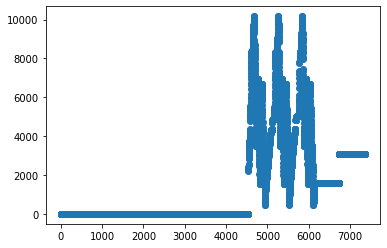

In [61]:
plt.scatter(length, new_y)

In [25]:
temp

,x,y,z,driver_number,date,session_key,meeting_key
0,0,0,0,55,2023-03-05T14:01:02.526000+00:00,7953,1141
1,0,0,0,55,2023-03-05T14:01:02.846000+00:00,7953,1141
2,0,0,0,55,2023-03-05T14:01:03.186000+00:00,7953,1141
3,0,0,0,55,2023-03-05T14:01:03.466000+00:00,7953,1141
4,0,0,0,55,2023-03-05T14:01:03.566000+00:00,7953,1141
...,...,...,...,...,...,...,...
36831,-235,1090,-159,55,2023-03-05T16:42:02.485000+00:00,7953,1141
36832,-235,1090,-159,55,2023-03-05T16:42:02.885000+00:00,7953,1141
36833,-235,1090,-159,55,2023-03-05T16:42:03.165000+00:00,7953,1141
36834,-235,1090,-159,55,2023-03-05T16:42:03.445000+00:00,7953,1141


In [23]:
temp.speed.unique()

array([  0,   2,   5,   7,  12,  15,  19,  24,  29,  34,  38,  39,  44,
        48,  51,  58,  60,  67,  74,  78,  79,  80,  77,  73,  70,  68,
        66,  62,  61,  59,  57,  53,  50,  47,  46,  42,  40,  37,  63,
        76,  82,  96,  99, 111, 121, 133, 143, 157, 164, 179, 185, 191,
       196, 208, 212, 221, 225, 230, 224, 201, 186, 171, 158, 137, 110,
        95,  85,  55,  49,  65,  83, 113, 123, 135, 140, 146, 152, 175,
       183, 192, 199, 206, 214, 217, 223, 229, 232, 236, 237, 241, 243,
       244, 246, 247, 250, 253, 254, 256, 257, 259, 260, 238, 219, 200,
       134, 126, 120, 118, 112, 115, 117, 128, 141, 148, 160, 167, 174,
       181, 188, 194, 204, 213, 222, 173, 198, 202, 211, 216, 215, 220,
       227, 226, 218, 127, 103,  94,  87,  84,  88,  92,  97, 150, 159,
       166, 178, 228, 233, 240, 242, 184, 169, 138, 114,  89,  72, 106,
       119, 156, 161, 176, 190, 195, 235, 249, 255, 261, 264, 265, 267,
       268, 271, 272, 273, 274, 266, 210, 187, 172, 170, 162, 15

In [18]:
temp

,driver_number,rpm,speed,n_gear,throttle,brake,drs,date,session_key,meeting_key
0,1,0,0,0,104,104,1,2023-03-05T14:01:02.639000+00:00,7953,1141
1,1,0,0,0,104,104,1,2023-03-05T14:01:02.999000+00:00,7953,1141
2,1,0,0,0,104,104,1,2023-03-05T14:01:03.279000+00:00,7953,1141
3,1,0,0,0,104,104,1,2023-03-05T14:01:03.439000+00:00,7953,1141
4,1,0,0,0,104,104,1,2023-03-05T14:01:03.679000+00:00,7953,1141
...,...,...,...,...,...,...,...,...,...,...
36042,1,0,0,0,0,0,0,2023-03-05T16:42:02.948000+00:00,7953,1141
36043,1,0,0,0,0,0,0,2023-03-05T16:42:03.229000+00:00,7953,1141
36044,1,0,0,0,0,0,0,2023-03-05T16:42:03.469000+00:00,7953,1141
36045,1,0,0,0,0,0,0,2023-03-05T16:42:03.709000+00:00,7953,1141
